In [1]:
from pyevolve import G1DBinaryString
from pyevolve import GSimpleGA
from pyevolve import Selectors
from pyevolve import DBAdapters

In [2]:
#fitness function
    
def fitness(chromosome):
   score = 0.0
   # iterate over the chromosome
   for value in chromosome:
      if value==1:
         score += 1
   return score

In [3]:
# Chromosome representation

# genome = bitstring
genome = G1DBinaryString.G1DBinaryString(20)

# how to compute the fitness
genome.evaluator.set(fitness)

# GA initialisation
ga = GSimpleGA.GSimpleGA(genome)
ga.setPopulationSize(100)
ga.setMutationRate(0.01)
ga.setCrossoverRate(0.9)
ga.selector.set(Selectors.GRouletteWheel)
ga.setElitism(True)

# Record evolution results in a database
sqlite_adapter = DBAdapters.DBSQLite(identify="log_bit-string")
ga.setDBAdapter(sqlite_adapter)

# Number of generations
ga.setGenerations(100)

# run the GA and print out stats every freq_stats generations
ga.evolve(freq_stats=10)

# Final best solution
print ga.bestIndividual()

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [11.84(16.00)/7.98(4.00)/9.87(9.87)]
Gen. 10 (10.00%): Max/Min/Avg Fitness(Raw) [14.27(19.00)/9.92(6.00)/11.89(11.89)]
Gen. 20 (20.00%): Max/Min/Avg Fitness(Raw) [16.08(19.00)/11.29(9.00)/13.40(13.40)]
Gen. 30 (30.00%): Max/Min/Avg Fitness(Raw) [17.82(19.00)/10.66(9.00)/14.85(14.85)]
Gen. 40 (40.00%): Max/Min/Avg Fitness(Raw) [18.98(20.00)/11.41(10.00)/15.82(15.82)]
Gen. 50 (50.00%): Max/Min/Avg Fitness(Raw) [20.00(20.00)/13.00(13.00)/16.67(16.67)]
Gen. 60 (60.00%): Max/Min/Avg Fitness(Raw) [20.63(20.00)/13.29(14.00)/17.19(17.19)]
Gen. 70 (70.00%): Max/Min/Avg Fitness(Raw) [21.25(20.00)/10.42(13.00)/17.71(17.71)]
Gen. 80 (80.00%): Max/Min/Avg Fitness(Raw) [21.44(20.00)/11.38(14.00)/17.87(17.87)]
Gen. 90 (90.00%): Max/Min/Avg Fitness(Raw) [21.16(20.00)/12.23(14.00)/17.63(17.63)]
Gen. 100 (100.00%): Max/Min/Avg Fitness(Raw) [21.55(20.00)/10.99(14.00)/17.96(17.96)]
Total time elapsed: 1.077 seconds.
- GenomeBase
	Score:			 20.000000
	Fitness:		 21.

Pyevolve 0.6rc1 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
100 generations found !


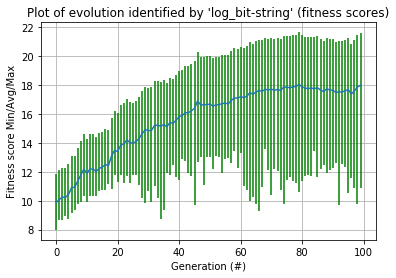

In [8]:
# Generate a graph showing the evolutionary results: fitness vs generations
%run ~/anaconda2/bin/pyevolve_graph.py -i log_bit-string -2

Pyevolve 0.6rc1 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
100 generations found !


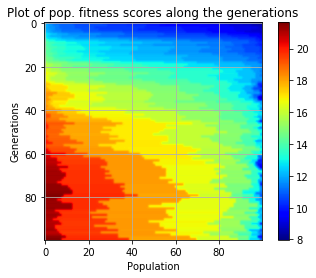

In [9]:
# Generate a heatmap of population fitness score distribution over generations
%run ~/anaconda2/bin/pyevolve_graph.py -i log_bit-string -9